In [2]:
!pip install scikit-learn --upgrade


#importing Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

 #Data Exploration:
 Data Description:
* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides
* Gender: The customer's gender
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings * account, credit card)
* HasCrCard: Whether the customer has a credit card
* IsActiveMember: Whether the customer is an active member
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (Target Variable)

In [4]:
df=pd.read_csv("Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Null Values:
Missing data/Null values is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

In [10]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
X=df. drop(["CustomerId","Surname","Exited"] ,axis=1)
y=df["Exited"]

In [8]:
print(X)

      RowNumber  CreditScore Geography  Gender  Age  Tenure    Balance  \
0             1          619    France  Female   42       2       0.00   
1             2          608     Spain  Female   41       1   83807.86   
2             3          502    France  Female   42       8  159660.80   
3             4          699    France  Female   39       1       0.00   
4             5          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995       9996          771    France    Male   39       5       0.00   
9996       9997          516    France    Male   35      10   57369.61   
9997       9998          709    France  Female   36       7       0.00   
9998       9999          772   Germany    Male   42       3   75075.31   
9999      10000          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                 1          1               

In [9]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [11]:
X

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


# Encoding Caegorical Variables

* One Hot Encoder:

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.

In [12]:
x_encoded=pd.get_dummies(X,columns=["Geography","Gender"])
x_encoded.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,2,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,3,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,4,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,5,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [13]:
sum(y)/len(y)

0.2037

# Splitting Data¶
As we discussed  both of the classes in our data are highly imbalanced. Almost 80% of our data is from class 0 (not exited) and 20% data is from class 1 (exited). Which also can be analyzed by dividing sum(y) withlen(y)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42,stratify=y)

In [15]:
sum(y_train)/len(y_train)

0.20373333333333332

# Creating Baseline Model:¶
Now that we have splitted the data into train and test set sucessfully. Let's create a baseline model for our data. We will try to improve the model by Hyperparameter Tuning and Cross-Validation.
The Basic understanding of the parameteres that I have used here in model is given below:

In [16]:
model=xgb.XGBClassifier(objective='binary:logistic',seed=42,early_stopping_rounds=10,eval_metric='auc')
model.fit(x_train,y_train,verbose=True, eval_set=[(x_test,y_test)])

[0]	validation_0-auc:0.85216
[1]	validation_0-auc:0.86248
[2]	validation_0-auc:0.86342
[3]	validation_0-auc:0.86539
[4]	validation_0-auc:0.86505
[5]	validation_0-auc:0.86568
[6]	validation_0-auc:0.86771
[7]	validation_0-auc:0.86942
[8]	validation_0-auc:0.86952
[9]	validation_0-auc:0.87022
[10]	validation_0-auc:0.87054
[11]	validation_0-auc:0.86957
[12]	validation_0-auc:0.87016
[13]	validation_0-auc:0.86872
[14]	validation_0-auc:0.86816
[15]	validation_0-auc:0.86784
[16]	validation_0-auc:0.86752
[17]	validation_0-auc:0.86723
[18]	validation_0-auc:0.86705
[19]	validation_0-auc:0.86702


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Evaluation
Now let's evaluate the model on the X_test and y_test data. I will be creating Confusion Matrix to know the performance of the model on both of the classes.

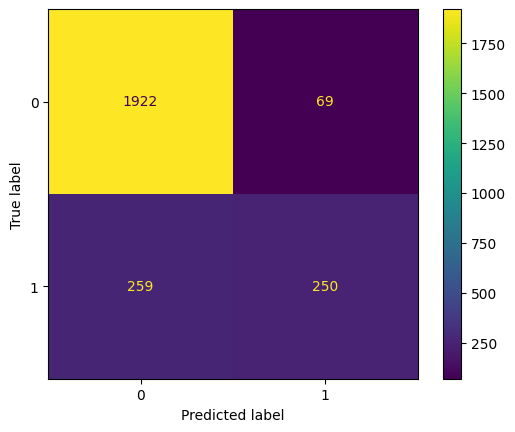

In [17]:
predict=model.predict(x_test)
cm=confusion_matrix(y_test,predict)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

# Hyperparameter Tuning and Cross-Validation

In [18]:
#round1
param_grid={
    'max_depth':[3,4,5],
    'learning_rate':[0.05,0.01,0.1],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]
}

optimal_paramter=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='auc',early_stopping_rounds=10,subsample=0.9,colsample_bytree=0.5),param_grid=param_grid,scoring='roc_auc',verbose=3,n_jobs=10,cv=3)
optimal_paramter.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=True)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[0]	validation_0-auc:0.66891
[1]	validation_0-auc:0.78307
[2]	validation_0-auc:0.79188
[3]	validation_0-auc:0.83120
[4]	validation_0-auc:0.85044
[5]	validation_0-auc:0.85469
[6]	validation_0-auc:0.85631
[7]	validation_0-auc:0.85831
[8]	validation_0-auc:0.85917
[9]	validation_0-auc:0.85899
[10]	validation_0-auc:0.86220
[11]	validation_0-auc:0.86235
[12]	validation_0-auc:0.86205
[13]	validation_0-auc:0.86215
[14]	validation_0-auc:0.86409
[15]	validation_0-auc:0.86477
[16]	validation_0-auc:0.86441
[17]	validation_0-auc:0.86359
[18]	validation_0-auc:0.86334
[19]	validation_0-auc:0.86329
[20]	validation_0-auc:0.86413
[21]	validation_0-auc:0.86422
[22]	validation_0-auc:0.86384
[23]	validation_0-auc:0.86397
[24]	validation_0-auc:0.86443
[25]	validation_0-auc:0.86430


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.05, 0.01, 0.1],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=3)

In [23]:
print(optimal_paramter.best_params_)

{'gamma': 1.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 50.0, 'scale_pos_weight': 7}


In [21]:
#round2
param_grid={
    'max_depth':[5,6,7],
    'learning_rate':[0.1,0.5,1],
    'gamma':[1.0,1.5,2],
    'reg_lambda':[10.0,25.0,50.0],
    'scale_pos_weight':[5,7,9]

}


optimal_paramter=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='auc',early_stopping_rounds=10,subsample=0.9,colsample_bytree=0.5),param_grid=param_grid,scoring='roc_auc',verbose=3,n_jobs=10,cv=3)
optimal_paramter.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=True)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[0]	validation_0-auc:0.66688
[1]	validation_0-auc:0.77986
[2]	validation_0-auc:0.80460
[3]	validation_0-auc:0.84697
[4]	validation_0-auc:0.85791
[5]	validation_0-auc:0.86065
[6]	validation_0-auc:0.86089
[7]	validation_0-auc:0.86136
[8]	validation_0-auc:0.86226
[9]	validation_0-auc:0.86280
[10]	validation_0-auc:0.86508
[11]	validation_0-auc:0.86494
[12]	validation_0-auc:0.86438
[13]	validation_0-auc:0.86399
[14]	validation_0-auc:0.86562
[15]	validation_0-auc:0.86651
[16]	validation_0-auc:0.86663
[17]	validation_0-auc:0.86643
[18]	validation_0-auc:0.86683
[19]	validation_0-auc:0.86672
[20]	validation_0-auc:0.86709
[21]	validation_0-auc:0.86710
[22]	validation_0-auc:0.86695
[23]	validation_0-auc:0.86671
[24]	validation_0-auc:0.86709
[25]	validation_0-auc:0.86700
[26]	validation_0-auc:0.86719
[27]	validation_0-auc:0.86807
[28]	validation_0-auc:0.86759
[29]	validation_0-auc:0.86752
[30]	validation_0-auc:0.86781
[31]	validation_0

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [1.0, 1.5, 2], 'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 6, 7],
                         'reg_lambda': [10.0, 25.0, 50.0],
                         'scale_pos_weight': [5, 7, 9]},
             scoring='roc_auc', verbose=3)

In [24]:
print(optimal_paramter.best_params_)

{'gamma': 1.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 50.0, 'scale_pos_weight': 7}


In [ ]:
# both cases we got same output

# Final Model:
Now that we have the best parameter we will create the model out of that.

In [25]:
model=xgb.XGBClassifier(seed=42 ,objective='binary:logistic',gamma=1.5,learning_rate=0.1,max_depth=5,eval_metric='auc',reg_lambda=50.0,scale_pos_weight=7,subsample=0.9,colsample_bytree=0.5)
model.fit(x_train,y_train,verbose=True, eval_set=[(x_test,y_test)])






[0]	validation_0-auc:0.66688
[1]	validation_0-auc:0.77986
[2]	validation_0-auc:0.80460
[3]	validation_0-auc:0.84697
[4]	validation_0-auc:0.85791
[5]	validation_0-auc:0.86065
[6]	validation_0-auc:0.86089
[7]	validation_0-auc:0.86136
[8]	validation_0-auc:0.86226
[9]	validation_0-auc:0.86280
[10]	validation_0-auc:0.86508
[11]	validation_0-auc:0.86494
[12]	validation_0-auc:0.86438
[13]	validation_0-auc:0.86399
[14]	validation_0-auc:0.86562
[15]	validation_0-auc:0.86651
[16]	validation_0-auc:0.86663
[17]	validation_0-auc:0.86643
[18]	validation_0-auc:0.86683
[19]	validation_0-auc:0.86672
[20]	validation_0-auc:0.86709
[21]	validation_0-auc:0.86710
[22]	validation_0-auc:0.86695
[23]	validation_0-auc:0.86671
[24]	validation_0-auc:0.86709
[25]	validation_0-auc:0.86700
[26]	validation_0-auc:0.86719
[27]	validation_0-auc:0.86807
[28]	validation_0-auc:0.86759
[29]	validation_0-auc:0.86752
[30]	validation_0-auc:0.86781
[31]	validation_0-auc:0.86771
[32]	validation_0-auc:0.86968
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

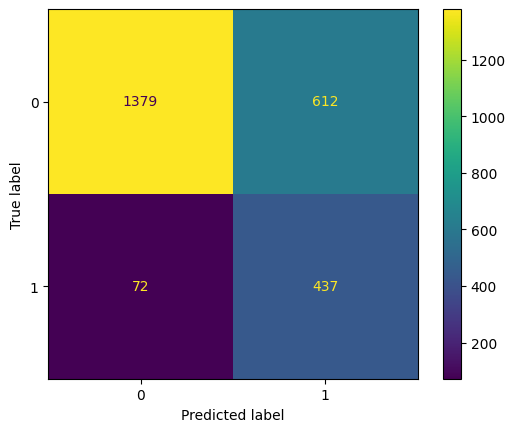

In [26]:
prediction=model.predict(x_test)
cm=confusion_matrix(y_test,prediction)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()